In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

hdis = pd.read_csv('Location-VS-HDI.csv')

hdis.head(-10)

,location,percent_deaths,development_index
0,Norway,0.013945,0.957
1,Ireland,0.099295,0.955
2,Switzerland,0.122848,0.955
3,Hong Kong,NaN,0.949
4,Iceland,0.008498,0.949
...,...,...,...
172,Liberia,0.001681,0.480
173,Guinea-Bissau,0.003404,0.480
174,Democratic Republic of Congo,0.000855,0.480
175,Guinea,0.001096,0.477


Text(0, 0.5, 'Percent of Deaths out of all Covid Cases')

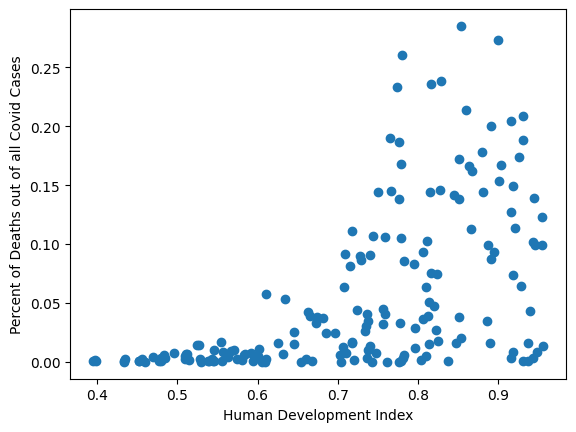

In [11]:
plt.scatter(hdis['development_index'], hdis['percent_deaths'])

plt.xlabel('Human Development Index')
plt.ylabel('Percent of Deaths out of all Covid Cases')

Text(0, 0.5, 'Percent of Deaths out of all Covid Cases')

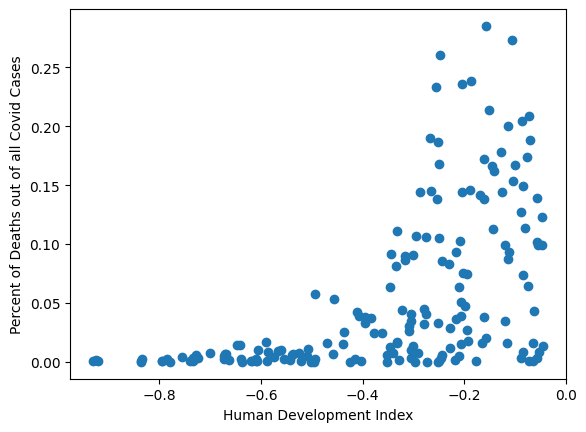

In [13]:
# using a log transformation
plt.scatter(np.log(hdis['development_index']), hdis['percent_deaths'])

plt.xlabel('Human Development Index')
plt.ylabel('Percent of Deaths out of all Covid Cases')


In [16]:
corr_coeff = hdis['development_index'].corr(hdis['percent_deaths'])

corr_coeff

0.550924100333604

title
